In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import requests
import ftfy
import re

# TRAIN

In [33]:
train = pd.read_csv('../data/dataset_penyisihan_bdc_2024.csv', delimiter=';')
train

,text,label
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik
...,...,...
4995,RT @l1DsGGe2xObT3t72dHwqlT58X7jvEYtEnauZIZSYwS...,Politik
4996,Masyarakat yakin bahwa Prabowo-Gibran memiliki...,Politik
4997,imo both are irrational but yg satu jauh lebih...,Ekonomi
4998,@cIIGSdjaPrmAQY1E4gWnLpIZSdyQn8ZMhjJzgOsxfRM= ...,Pertahanan dan Keamanan


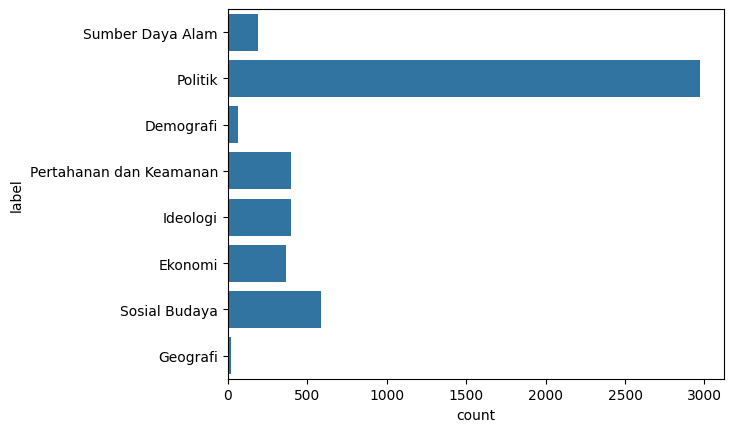

In [ ]:
sns.countplot(train['label'])
plt.show()

In [ ]:
train['hashtags'] = train['text'].apply(lambda x: [i for i in x.split() if i.startswith("#")])
train['hashtags'] = train['hashtags'].apply(lambda x: ' '.join(x))

In [28]:
def get_hashtags(text):
    hashtags = re.findall(r"#([^ ]+)", text)
    return hashtags

train['hashtags'] = train['text'].apply(get_hashtags)

print(train.head(5))

                                                text             label  \
0  Kunjungan Prabowo ini untuk meresmikan dan men...  Sumber Daya Alam   
1  RT Anies dapat tepuk tangan meriah saat jadi R...           Politik   
2  @CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...         Demografi   
3  RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...           Politik   
4  Anies Baswedan Harap ASN termasuk TNI dan Polr...           Politik   

                                            hashtags  
0  [IndonesiaSentris, IndonesiaHijau, 02Melanjutk...  
1                            [AminMiskinkanKoruptor]  
2                                                 []  
3                                                 []  
4                                                 []  


In [29]:
labels = train['label'].unique()
labels

array(['Sumber Daya Alam', 'Politik', 'Demografi',
       'Pertahanan dan Keamanan', 'Ideologi', 'Ekonomi', 'Sosial Budaya',
       'Geografi'], dtype=object)

# TEST

In [9]:
test = pd.read_excel('../data/dataset_unlabeled_penyisihan_bdc_2024.xlsx')
test

,IDText,Text
0,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...
1,TXT0002,Prabowo ditanya soal hutang luar negeri dia me...
2,TXT0003,kiki_daliyo Ganjar Pranowo itulah beliau soso...
3,TXT0004,@kumparan Prabowo Gibran yang bisa melakukan i...
4,TXT0005,@sniperruben45 @uda_zulhendra @ainunnajib Lah ...
...,...,...
995,TXT0996,"Bikin bangga deh, Ganjar-Mahfud mau alokasikan..."
996,TXT0997,Pak Jokowi sebelum pilpres 2024 berbesar hati ...
997,TXT0998,@datuakrajoangek Sbaiknya si gemot nga usah ik...
998,TXT0999,kebiasaan merembuk atau bermusyawarah jadi gay...


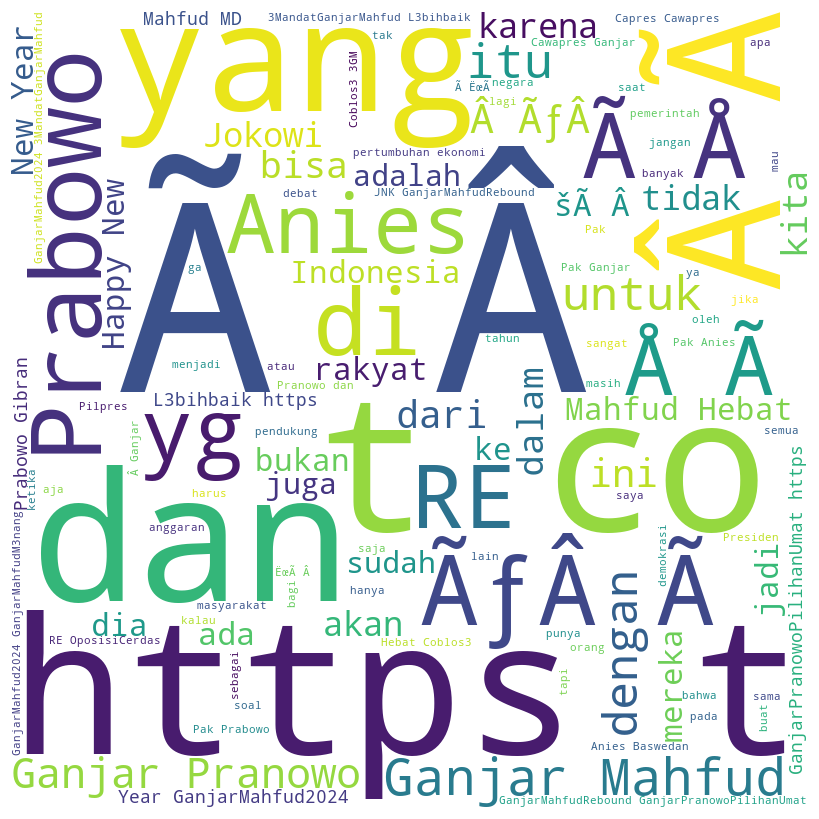

In [10]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(' '.join(test['Text']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Utility

In [11]:
test['url'] = test['Text'].str.extract(r'(https?://\S+)')
test['url'].notnull().sum()

624

In [13]:
test['url'].dropna().to_csv('../data/url_test.txt', index=False, header=False)

In [16]:
url = 'https://t.co/V9takkzJhJ'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
content = ' '.join(soup.stripped_strings)
content

'x.com'

In [ ]:
with open('../data/url_test.txt') as f:
    urls = f.read().splitlines()

contents = []

for url in urls:
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        content = ' '.join(soup.stripped_strings)
        contents.append(content)
    except:
        contents.append(None)

with open('../data/contents_test.txt', 'w') as f:
    for content in contents:
        if content is not None:
            f.write(content)
            f.write('\n')
        else:
            f.write('None')
            f.write('\n')